**Code to git 8bit light curve using BATMAN and lmfit**

In [1]:
import batman
import numpy as np
import matplotlib.pyplot as plt
import lmfit


In [2]:
# 1. Load Lightcurve Dataset
lcFlux_dir = '/scratch/abraham/Documents/mega_git/mega/data/random/npy/lc/lc_1_14Feb2024_circle_38_38_px.npy'
lcFlux = np.load(lcFlux_dir)

lcTime_dir = '/scratch/abraham/Documents/mega_git/mega/data/random/npy/lc/time/time_lc_1_14Feb2024_circle_38_38_px.npy'
lcTime = np.load(lcTime_dir)

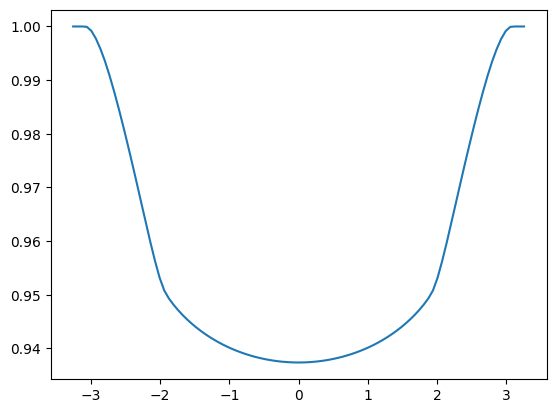

In [3]:
plt.plot(lcTime[0],lcFlux[0])
plt.show()

In [10]:
# Define BATMAN model
def transit_model(params, time, flux):
    # Extract parameters
    period = params['period'].value
    rprs = params['rprs'].value
    t0 = params['t0'].value
    inc = params['inc'].value
    ecc = params['ecc'].value
    w = params['w'].value
    u1 = params['u1'].value
    u2 = params['u2'].value

    # Initialize BATMAN parameters
    bat_params = batman.TransitParams()
    bat_params.t0 = t0
    bat_params.per = period
    bat_params.rp = rprs
    bat_params.a = 15  # semi-major axis (in units of stellar radii)
    bat_params.inc = inc
    bat_params.ecc = ecc
    bat_params.w = w
    bat_params.u = [u1,u2]
    bat_params.limb_dark = "quadratic"  # Limb darkening model

    m = batman.TransitModel(bat_params, time)
    model_flux = m.light_curve(bat_params)

    return model_flux - flux

# Load data (time, flux)

# Create lmfit parameters
params = lmfit.Parameters()
params.add('period', value=1.0)
params.add('rprs', value=0.1)
params.add('t0', value=0.0)
params.add('inc', value=90.0)
params.add('ecc', value=0.0)
params.add('w', value=90.0)
params.add('u1', value=0.5)  # limb darkening coefficient 1
params.add('u2', value=0.05)  # limb darkening coefficient 2
# Create lmfit Model
model = lmfit.Model(transit_model)

# Perform fitting
result = model.fit(lcFlux[0], params, time=lcTime[0])

# Print fitting result
print(result.fit_report())

# Plot results
result.plot_fit()

ValueError: Invalid independent variable name ('params') for function transit_model

In [ ]:
out = minimize(residual, params, args=(x, data, uncertainty))
